#### **Imports**

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

colors = ['crimson','midnightblue', 'magenta','orange','springgreen','dodgerblue','darkviolet', 'olive','tomato']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

#### **Problem 3**

In [54]:
island_size = 5 # Radius

##### **Problem 3a**

In [58]:
def is_inside_circle(x, y, radius=island_size):
    return x**2 + y**2 < radius**2

def move_crab(x,y):
    
    direction = np.random.uniform(0,2*np.pi)
    
    distance_to_edge = np.sqrt(island_size**2 - x**2 - y**2)
    distance = min(0.2, distance_to_edge) 

    x_change = distance * np.cos(direction)
    y_change = distance * np.sin(direction)

    if is_inside_circle(x+x_change,y+y_change):
        return x+x_change,y+y_change
    else:
        return x , y

In [61]:
x , y = 3.6 , -2 # Generate crab initial position

days = 200

x_coords , y_coords = [3.6] , [-2]

for day in range(days):
    x , y = move_crab(x,y)
    x_coords.append(x)
    y_coords.append(y)

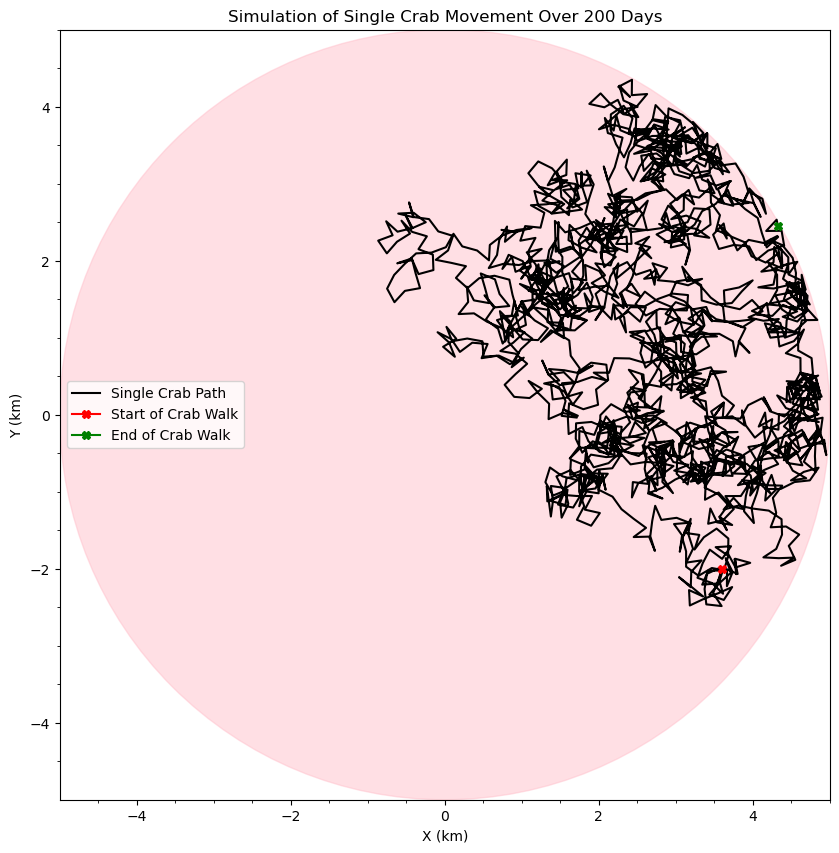

In [62]:
island = plt.Circle((0, 0), island_size, color='pink', alpha=0.5)
fig, ax = plt.subplots(figsize=(10,10))
ax.add_artist(island)
ax.plot(x_coords, y_coords, color='k',linestyle='-', label='Single Crab Path')
ax.plot(x_coords[0],y_coords[0],color='red',marker='X',label='Start of Crab Walk')
ax.plot(x_coords[-1],y_coords[-1],color='green',marker='X',label='End of Crab Walk')
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(which='minor', length=2, color='k')
ax.set_xlim(-island_size, island_size)
ax.set_ylim(-island_size, island_size)
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_title('Simulation of Single Crab Movement Over 200 Days')
ax.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()